In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver


In [ ]:
code = "^GSPC"
begin_time = "2023-01-01"
end_time = "2024-01-24"
data_src = DATA_SRC.YAHOO_FINANCE
lv_list = [KL_TYPE.K_DAY]

config = CChanConfig({
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})


In [38]:
plot_config = {
    "plot_kline": True,
    "plot_kline_combine": True,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
}

plot_para = {
    "figure": {"x_range": 1000},
}


/Users/ningtang/Desktop/Work/chan.py-main/DataAPI/YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
/Users/ningtang/Desktop/Work/chan.py-main/DataAPI/YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
/Users/ningtang/Desktop/Work/chan.py-main/DataAPI/YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
/Users/ningtang/Desktop/Work/chan.py-main/DataAPI/YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  D

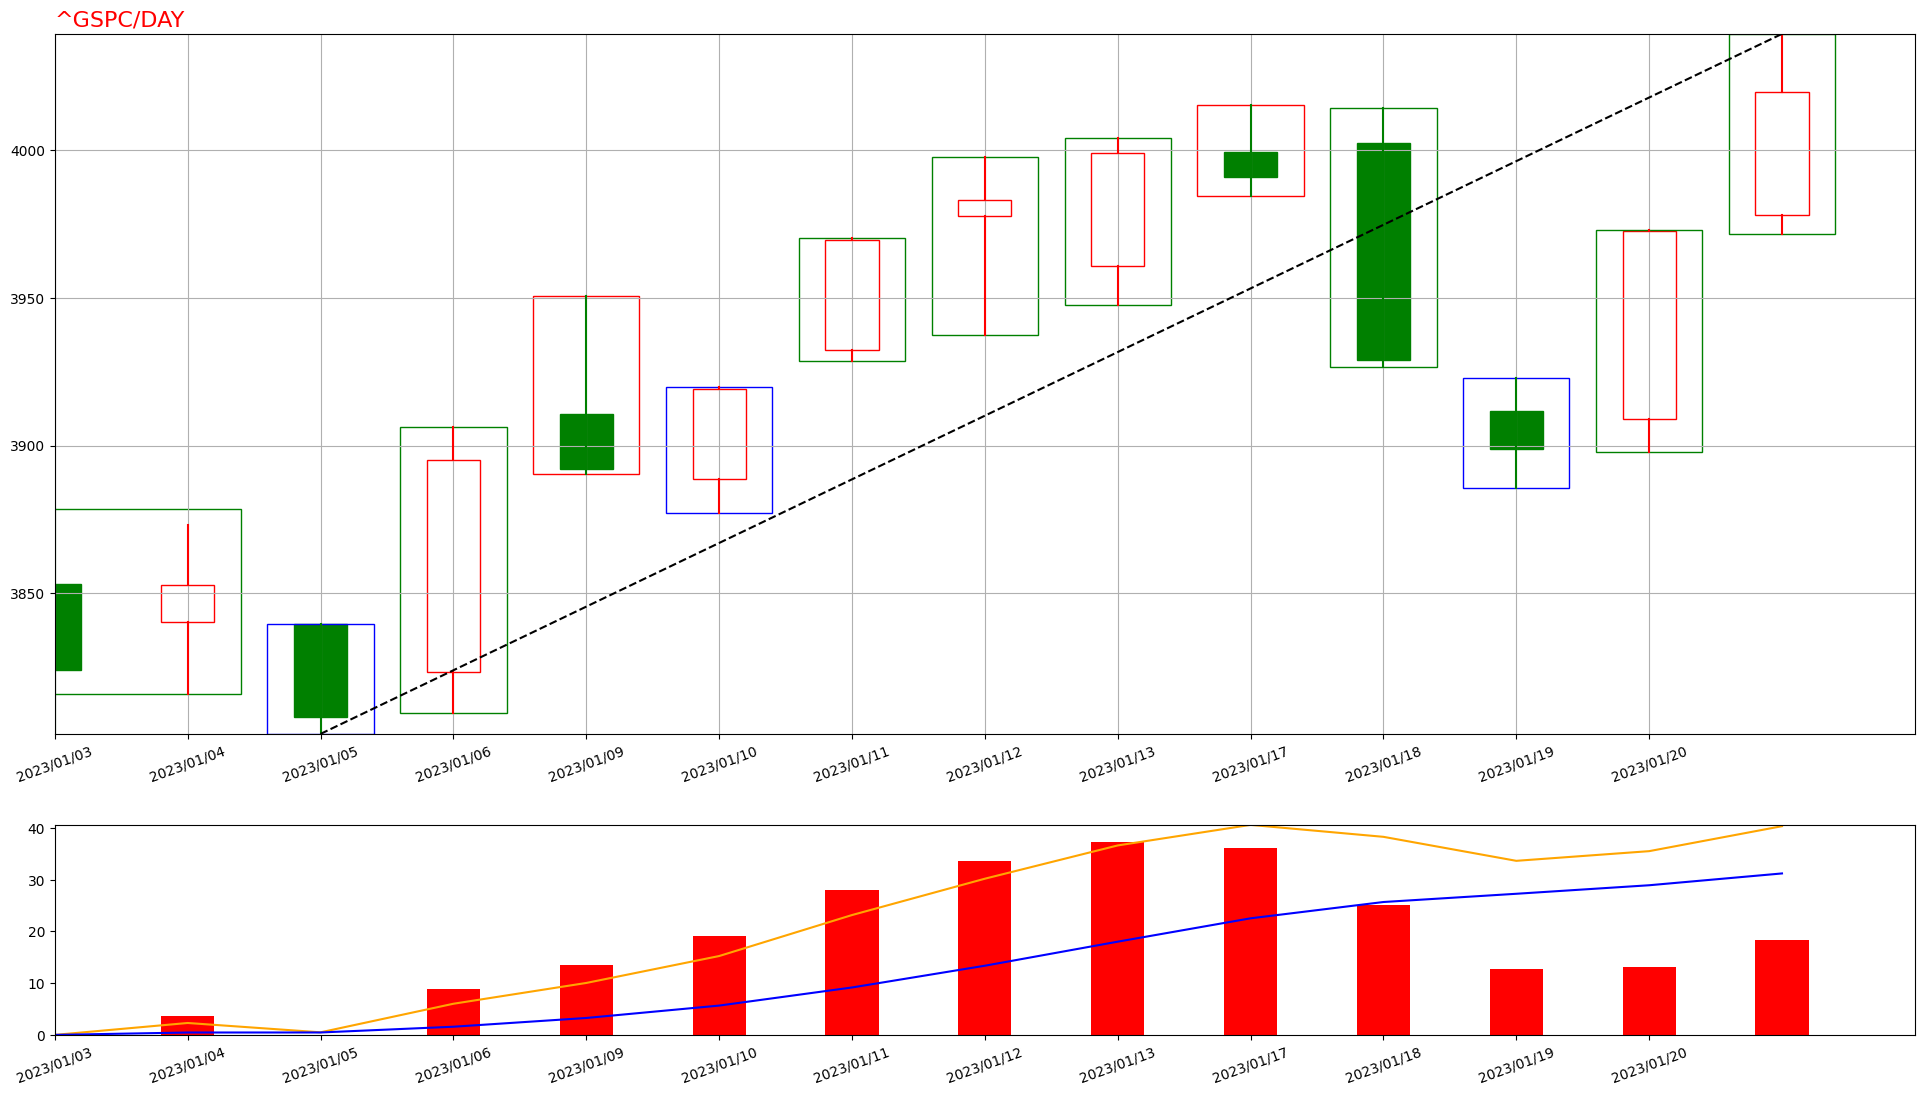

In [39]:
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
plot_driver.figure.show()